 Looking to find the most expensive metro areas by median home price in the US.
 
Context

Zillow has a lot of data about housing prices in America.

Content

Data about housing prices and rental prices broken down according to city and state and number of bedrooms. More detail can be found at https://www.zillow.com/research/data/ and at https://www.zillow.com/research/home-sales-methodology-7733/.

Acknowledgements

The data was downloaded from https://www.zillow.com/research/data/. Banner photo from Ian Keefe on Unsplash. Dataset license described at https://www.zillow.com/research/data/.

In [184]:
#data organization and upload
import numpy as np
import pandas as pd

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#cleaning dictionaries
from math import isnan

#setting filter warnings to ignore to keep our notebook clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data from csv into pandas dataframe
data = pd.read_csv("City_Zhvi_2bedroom.csv")

In [3]:
#reviewing the dtaframe to ensure it loaded properly
data.head()

,Unnamed: 0,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [4]:
#create clean dataframe by removing unneeded columns
columns = list(data.columns)
#removing unnamed column
columns = columns[1:]

In [5]:
#define new df
df =data[columns]
#checking new df
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,213804.000000,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [6]:
#basic df summary stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Columns: 149 entries, RegionID to 2019-11
dtypes: float64(143), int64(2), object(4)
memory usage: 22.2+ MB


In [7]:
#number of  cities/regions in dataset
len(df.RegionID.unique())

19552

In [8]:
#number of MSAs (metropolitan service areas) in dataset
len(df.Metro.unique())

850

The file from Zillow represents monthly home price data from Jan 2008 to November 2019.  

This is a total of 142 months.  There are 19,551 city regions and 850 metro areas.

The data set is a little messy.  The first step is to deal with the NAN values un the MSA column.

In [9]:
#creating a df copy so we don't lose the original data if we need it
metro_df = df.copy()
metro_df.fillna(0,inplace=True)

In [10]:
#tallying NANs in string columns
metro_df.iloc[:,:6].isna().sum()

RegionID      0
RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
dtype: int64

In [13]:
metro_df.Metro[metro_df.Metro == 0].count()

4350

In [11]:
#printing the data loss if we were to remove all NANs
print("{}% loss of data".format(round((4350/19551)*100,2)))

22.25% loss of data


Ouch!  There are a number of unincorporated areas in the US, and even cities that are not included in a MSA, believe it or not.  The ask is directly about MSA prices as well.  Given these two facts, I think its the right move to drop the NANs out of the working DF.  These areas can be dealt with at a later date.


In [14]:
#droping rows where msa is NAN
metro_df.drop(metro_df.index[metro_df.Metro ==0], inplace = True)


In [15]:
#reviewing DF
metro_df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,0.0,0.0,0.000000,0.000000,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,39051,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,17426,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,0.0,0.0,0.000000,213804.000000,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,6915,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [16]:
#checking to see if we still have NANs
metro_df.iloc[:,:6].isna().sum()

RegionID      0
RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
dtype: int64

In [17]:
#getting rid of region id since it's not useful to the analysis
metro_df = metro_df.iloc[:,1:]

In [18]:
metro_df.head()

,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,2008-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,569521.0,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,0.0,0.0,0.000000,0.000000,0.0,...,599677.666667,598162.333333,598823.000000,600231.000000,603184.333333,607904.666667,613860.000000,620111.666667,623957.333333,626501.666667
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,97050.0,96793.5,96671.666667,96087.000000,95375.0,...,135923.000000,136778.666667,137111.666667,137613.666667,138303.000000,138913.333333,139524.000000,139964.666667,140836.000000,140799.000000
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,0.0,0.0,0.000000,213804.000000,215913.0,...,226506.333333,226949.666667,227951.000000,228515.333333,228289.000000,227479.666667,226601.333333,225887.333333,225615.666667,225706.000000
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,80354.0,80612.0,80738.666667,80994.333333,80945.0,...,116293.333333,117501.000000,118332.666667,118989.666667,119935.333333,120798.000000,121715.000000,122682.000000,122805.666667,122679.000000


In [19]:
#creating new empty df with custom column names
df_prices = pd.DataFrame(columns =['region', 'state', 'metro','size_rank','mean'])

In [20]:
#checking df was created properly
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
region       0 non-null object
state        0 non-null object
metro        0 non-null object
size_rank    0 non-null object
mean         0 non-null object
dtypes: object(5)
memory usage: 0.0+ bytes


In [21]:
#populating df
df_prices.region = metro_df.RegionName
df_prices.state = metro_df.State
df_prices.metro = metro_df.Metro
df_prices.size_rank = metro_df.SizeRank

In [22]:
#taking the average of prices over the whole time frame
means = []
for i in range(len(df_prices.region)):
    val = np.mean(metro_df.iloc[i,6:])
    means.append(val)
df_prices['mean'] = means

In [23]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15202 entries, 0 to 19551
Data columns (total 5 columns):
region       15202 non-null object
state        15202 non-null object
metro        15202 non-null object
size_rank    15202 non-null int64
mean         15202 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 712.6+ KB


We already have median values, but we're taking the mean of the median values.  In this case - we just did the calculation line by line.  The next step is to do the calculation again, but averaging all the cities/towns that are included in each Metro Area.  For example L.A. and Anaheim are both in the same metropolitan area in CA, so we'll need to take the mean of these values.

In [24]:
#creating a list of all the metro areas to iterate over
metros = list(df_prices.metro.unique())

In [25]:
#Empty dictionary that has each MSA with the mean of the home prices in all cities in the msa
metro_dict = {}
for msa in metros:        
    metro_dict[msa]= np.mean(df_prices[df_prices.metro==msa])

In [26]:
#checking the value of one MSA
metro_dict['New York-Newark-Jersey City']

size_rank      5893.636511
mean         314474.951721
dtype: float64

In [27]:
#previous cell also took into acount the size rank
#dropping sizerank out of the analysis
mean_metro = {}
#interating over new dictionary
for msa in metros:
    mean_metro[msa]= round(metro_dict[msa][1],2)

In [28]:
#checking the same MSA as before
mean_metro['New York-Newark-Jersey City']

314474.95

In [29]:
#generating a new df with only our updated means and the msa names
msa_price = pd.DataFrame(columns = ['MSA','MeanPrice'])

In [30]:
#populating the df
msa_price.MSA = mean_metro.keys()
msa_price.MeanPrice = mean_metro.values()

In [31]:
#reviewing the df
msa_price.head()

,MSA,MeanPrice
0,New York-Newark-Jersey City,314474.95
1,Los Angeles-Long Beach-Anaheim,369116.05
2,Houston-The Woodlands-Sugar Land,107003.34
3,Chicago-Naperville-Elgin,133582.97
4,San Antonio-New Braunfels,140443.56


In [32]:
#sorting a df by home price high to low
msa_mean_sort =msa_price.sort_values(by = ['MeanPrice'], ascending=False)

In [33]:
#resetting the index
msa_mean_sort.reset_index(inplace=True)
#removing the duplicate index column
msa_mean_sort.drop(columns = ['index'], inplace = True)

In [34]:
#reviewing the df
msa_mean_sort.head(10)

,MSA,MeanPrice
0,San Jose-Sunnyvale-Santa Clara,643333.35
1,Port St. Lucie,574089.90
2,Vineyard Haven,545349.88
3,Kapaa,499137.71
4,San Francisco-Oakland-Hayward,457746.34
5,Kahului-Wailuku-Lahaina,429485.62
6,Santa Maria-Santa Barbara,423260.87
7,Los Angeles-Long Beach-Anaheim,369116.05
8,Urban Honolulu,354167.97
9,Salinas,341460.01


In [35]:
#setting the plot styling with seaborn
sns.set_style('whitegrid')

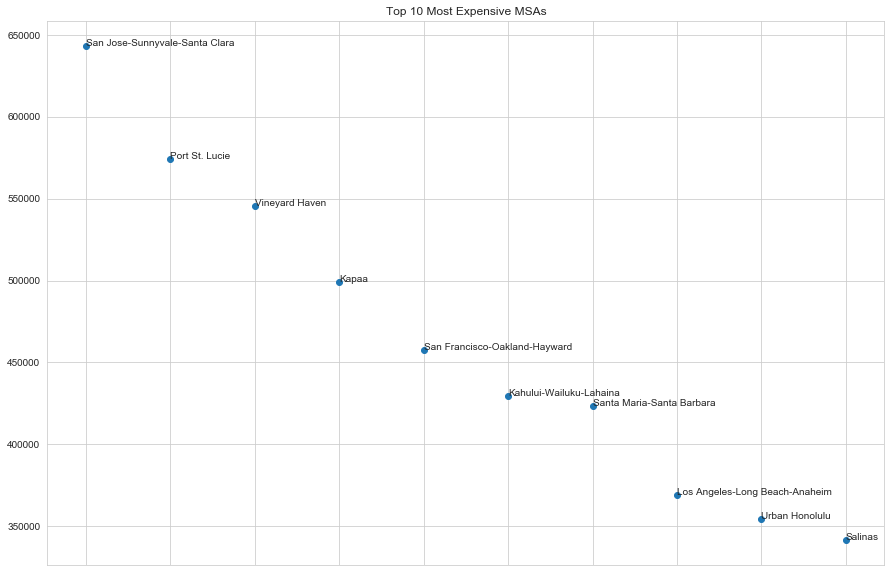

In [36]:
#Plotting the top 10 most expesive home prices
fig, ax = plt.subplots(figsize=(15,10))

#using a scatter plot, with one point representing the average price in a city
x = msa_mean_sort.MSA[:10]
y = msa_mean_sort.MeanPrice[:10]
labels =x
ax.scatter(x, y,label =labels)

#labeling each data point
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
#since the data points are labeled, take out the x-axis labels    
ax.xaxis.set_ticklabels([])

ax.set_title('Top 10 Most Expensive MSAs')
plt.show()

This dataset is not that surprising.  The states that each of these MSAs are located in make sense.
  - 5 in CA
  - 3 in HI
  - 1 in MA (Martha's vineyard)
  - 1 in FL (Jupiter island)
 
I was surprised that this does not include New York City, but the home prices in the whole MSA are included.  The NYC MSA also includes Newark, where home prices are considerably less than Manhattan.  
 
 
The next visual will essentially do the same thing but will also  weight the datapoints on the size of the city rank.

In [37]:
#extracting the sizerank from the old dictionary
s = [metro_dict[msa][0]for msa in labels]

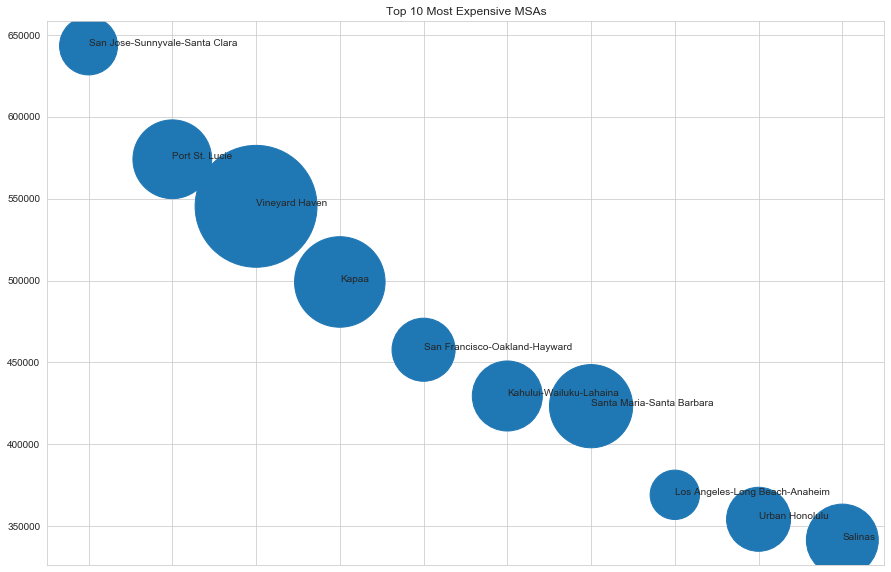

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
#adding a value for s with 'size' the dots
ax.scatter(x, y,label =labels, s=s)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))
ax.xaxis.set_ticklabels([])
ax.set_title('Top 10 Most Expensive MSAs')
plt.show()

This is a really impressive visual, though since rank is a higher value for lower population density, the graph is a little counter intuitive.  San Jose, which includes Silicon Valley, has on average the highest median home price in the US for the last 10 years, at over 650k for an average median price.  Given the wealth in the area I can't say that I am surprised by this finding either.  As a contrast the average median price in the MSA where I grew up is only $122k and the MSA where I currently reside is 261k.



# what else can we learn - lets look at a few msas and track their movement over time


In [110]:
ny_df = df[df.State == 'NY']
ny_df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2008-01,2008-02,2008-03,2008-04,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,576827.0,576551.0,575294.000000,573466.333333,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
86,17222,Buffalo,NY,Buffalo-Cheektowaga-Niagara Falls,Erie County,87,57165.0,56861.5,56917.666667,56842.000000,...,85312.666667,86351.333333,87165.666667,87838.333333,88679.666667,89440.333333,90333.000000,90891.000000,91291.000000,91866.666667
129,34937,Yonkers,NY,New York-Newark-Jersey City,Westchester County,130,491565.0,488515.5,484546.666667,478239.666667,...,468635.000000,469873.666667,472966.333333,477067.333333,479291.000000,478921.666667,477858.000000,478943.000000,477935.000000,476596.000000
210,7353,Syracuse,NY,Syracuse,Onondaga County,211,71542.0,71499.0,71623.000000,71693.000000,...,79226.666667,79167.000000,79653.666667,80588.666667,81468.333333,82227.000000,82613.000000,82950.000000,83448.333333,83812.666667
240,395433,Ramapo,NY,New York-Newark-Jersey City,Rockland County,241,326112.0,325179.0,325396.000000,324823.333333,...,301574.000000,302956.000000,303223.666667,302449.333333,300735.000000,300266.000000,301646.666667,303026.333333,302821.666667,302004.333333


In [111]:
ny_df.drop(columns = ['RegionID','CountyName','SizeRank'], inplace = True)
ny_df.head()

,RegionName,State,Metro,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,New York,NY,New York-Newark-Jersey City,576827.0,576551.0,575294.000000,573466.333333,569521.000000,565227.333333,559953.000000,...,755775.000000,755544.000000,755377.333333,755510.333333,754488.666667,753482.666667,751084.000000,747943.000000,745139.333333,743173.333333
86,Buffalo,NY,Buffalo-Cheektowaga-Niagara Falls,57165.0,56861.5,56917.666667,56842.000000,57070.666667,56748.333333,56551.000000,...,85312.666667,86351.333333,87165.666667,87838.333333,88679.666667,89440.333333,90333.000000,90891.000000,91291.000000,91866.666667
129,Yonkers,NY,New York-Newark-Jersey City,491565.0,488515.5,484546.666667,478239.666667,474467.666667,472677.333333,472316.333333,...,468635.000000,469873.666667,472966.333333,477067.333333,479291.000000,478921.666667,477858.000000,478943.000000,477935.000000,476596.000000
210,Syracuse,NY,Syracuse,71542.0,71499.0,71623.000000,71693.000000,71660.333333,71301.666667,70886.000000,...,79226.666667,79167.000000,79653.666667,80588.666667,81468.333333,82227.000000,82613.000000,82950.000000,83448.333333,83812.666667
240,Ramapo,NY,New York-Newark-Jersey City,326112.0,325179.0,325396.000000,324823.333333,323502.333333,322361.000000,320880.666667,...,301574.000000,302956.000000,303223.666667,302449.333333,300735.000000,300266.000000,301646.666667,303026.333333,302821.666667,302004.333333


In [113]:
ny_df[ny_df.Metro== 'New York-Newark-Jersey City']

,RegionName,State,Metro,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
0,New York,NY,New York-Newark-Jersey City,576827.0,576551.0,575294.000000,573466.333333,569521.000000,565227.333333,559953.000000,...,7.557750e+05,7.555440e+05,7.553773e+05,7.555103e+05,7.544887e+05,7.534827e+05,7.510840e+05,7.479430e+05,7.451393e+05,7.431733e+05
129,Yonkers,NY,New York-Newark-Jersey City,491565.0,488515.5,484546.666667,478239.666667,474467.666667,472677.333333,472316.333333,...,4.686350e+05,4.698737e+05,4.729663e+05,4.770673e+05,4.792910e+05,4.789217e+05,4.778580e+05,4.789430e+05,4.779350e+05,4.765960e+05
240,Ramapo,NY,New York-Newark-Jersey City,326112.0,325179.0,325396.000000,324823.333333,323502.333333,322361.000000,320880.666667,...,3.015740e+05,3.029560e+05,3.032237e+05,3.024493e+05,3.007350e+05,3.002660e+05,3.016467e+05,3.030263e+05,3.028217e+05,3.020043e+05
571,Town of Poughkeepsie,NY,New York-Newark-Jersey City,230853.0,231544.5,230776.666667,229783.000000,226573.666667,223543.000000,220749.666667,...,1.857393e+05,1.867830e+05,1.873297e+05,1.887137e+05,1.891203e+05,1.905240e+05,1.911550e+05,1.917490e+05,1.928543e+05,1.941273e+05
588,New Rochelle,NY,New York-Newark-Jersey City,495862.0,493162.5,490203.000000,484698.333333,480762.666667,478346.666667,476762.000000,...,5.349423e+05,5.407467e+05,5.441507e+05,5.468140e+05,5.455360e+05,5.430740e+05,5.429860e+05,5.436177e+05,5.430380e+05,5.389690e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18211,Verplanck,NY,New York-Newark-Jersey City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.976213e+05,2.960080e+05,2.927187e+05,2.901563e+05,2.899300e+05,2.917327e+05,2.944130e+05,2.972883e+05,2.983687e+05,3.001297e+05
18423,Orient,NY,New York-Newark-Jersey City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.797783e+05,6.887870e+05,6.947880e+05,6.960927e+05,6.962807e+05,6.911200e+05,6.899907e+05,6.874257e+05,6.870420e+05,6.821217e+05
18667,Sagaponack,NY,New York-Newark-Jersey City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.325605e+06,2.320907e+06,2.335261e+06,2.365630e+06,2.393900e+06,2.409151e+06,2.402383e+06,2.382505e+06,2.354725e+06,2.323457e+06
18818,Town Of Blooming Grove,NY,New York-Newark-Jersey City,200763.0,201189.5,200568.666667,199713.000000,198366.333333,197294.666667,196349.000000,...,1.569273e+05,1.593737e+05,1.615163e+05,1.633740e+05,1.646947e+05,1.650527e+05,1.658447e+05,1.674443e+05,1.698850e+05,1.722253e+05


In [124]:
ny_metros = {}
for m in ny_df.Metro.unique():
    ny_metros[m]= {}

In [ ]:
cols = ny_df.columns[3:]

In [146]:
for msa in ny_metros.keys():
    ny_metros[msa]= np.mean(ny_df[(ny_df.Metro == msa)])

In [189]:
#removing the nans in a dict where keys are strings
ny_metros = {k: ny_metros[k] for k in ny_metros if type(k) is str}

In [190]:
ny_metros.keys()


dict_keys(['New York-Newark-Jersey City', 'Buffalo-Cheektowaga-Niagara Falls', 'Syracuse', 'Albany-Schenectady-Troy', 'Rochester', 'Utica-Rome', 'Binghamton', 'Ithaca', 'Jamestown-Dunkirk-Fredonia', 'Plattsburgh', 'Glens Falls', 'Auburn', 'Kingston', 'Amsterdam', 'Batavia', 'Elmira', 'Cortland', 'Oneonta', 'Corning', 'Olean', 'Gloversville', 'Malone', 'Seneca Falls', 'Hudson', 'Ogdensburg-Massena', 'Watertown-Fort Drum'])

nested dict. by msa  so now we can plot each msa over time

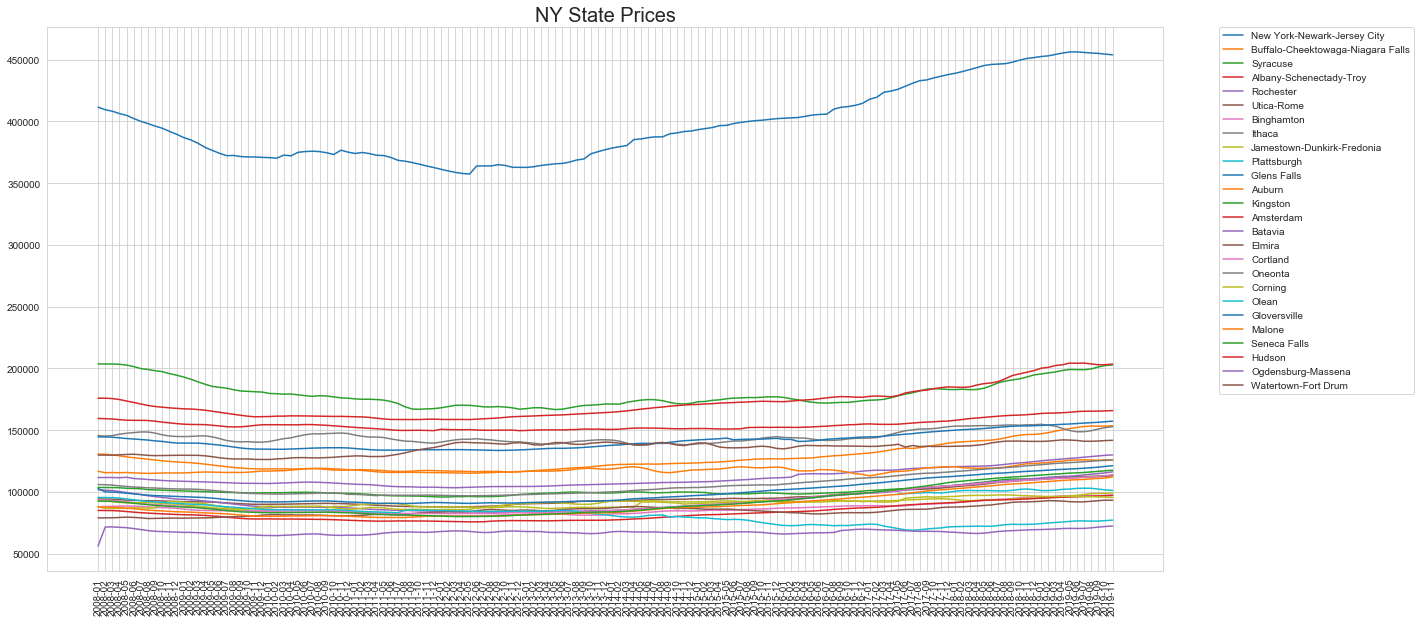

In [205]:
fig, ax = plt.subplots(figsize=(20,10))
keys1 = ny_metros.keys()
for msa in keys1:
    ax.plot(ny_metros[msa].keys(), ny_metros[msa],label = msa)
ax.set_title('NY State Prices', fontsize = 20)
ax.xaxis.set_ticklabels(cols)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.show()

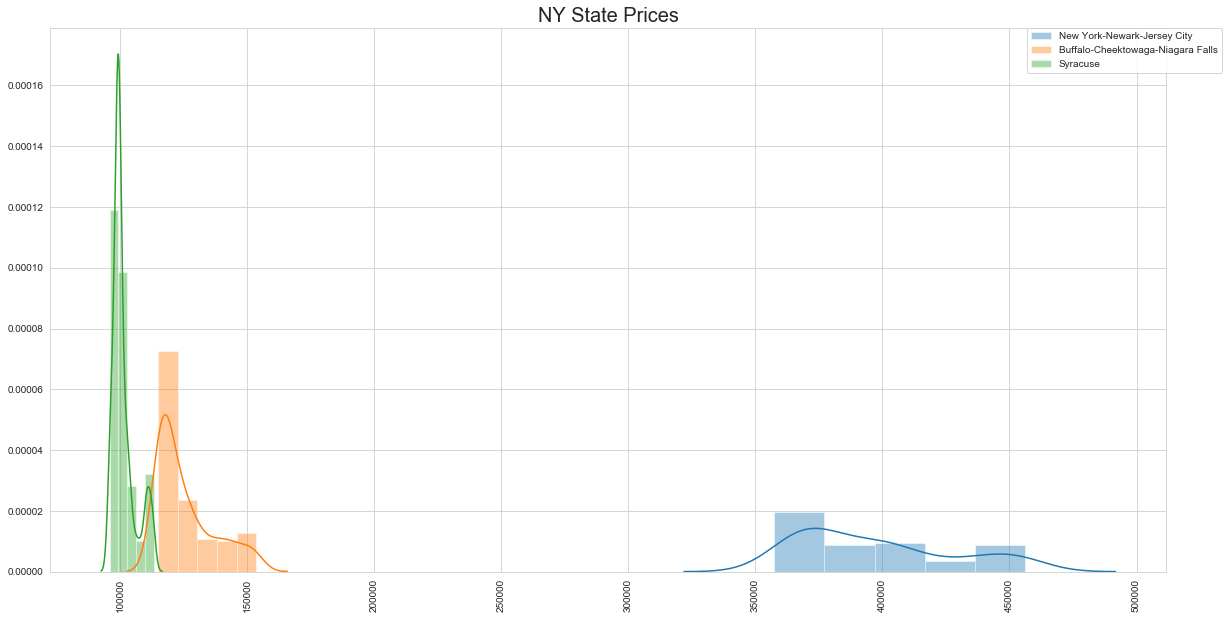

In [206]:
fig, ax = plt.subplots(figsize=(20,10))
keys_topny =list(keys1)[:3]
for msa in keys_topny:
    sns.distplot(ny_metros[msa],bins =5 ,label = msa)
ax.set_title('NY State Prices', fontsize = 20)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.show()

same for CO!!!!

In [171]:
co_df = df[df.State == 'CO']
co_df.drop(columns = ['RegionID','CountyName','SizeRank'], inplace = True)
co_df.head()

,RegionName,State,Metro,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
23,Denver,CO,Denver-Aurora-Lakewood,219988.0,219087.5,218215.666667,216358.333333,214613.000000,213274.000000,211813.333333,...,400997.333333,400935.333333,400096.333333,399211.000000,398731.666667,398377.666667,398558.666667,398069.000000,397395.333333,396848.333333
42,Colorado Springs,CO,Colorado Springs,153851.0,153720.5,153041.666667,151886.333333,150644.333333,149570.666667,148789.666667,...,218805.666667,219590.666667,219785.666667,219854.333333,220688.000000,222164.000000,224295.666667,226873.666667,229103.000000,231039.666667
55,Aurora,CO,Denver-Aurora-Lakewood,152810.0,151953.5,150496.333333,148000.333333,145930.666667,144868.333333,144015.666667,...,275851.000000,277073.000000,278216.000000,278253.666667,278120.000000,277362.666667,276294.666667,276063.000000,276143.333333,277656.666667
144,Fort Collins,CO,Fort Collins,176749.0,176124.0,175961.000000,175294.333333,174810.666667,174285.333333,174048.000000,...,315905.000000,317611.000000,317749.000000,317195.333333,315731.666667,315606.333333,315100.666667,315437.000000,314599.333333,315011.333333
184,Pueblo,CO,Pueblo,96272.0,95723.5,95362.000000,94445.333333,93767.666667,93078.000000,92523.333333,...,121806.666667,122742.000000,123785.333333,124496.000000,125312.333333,125696.666667,125185.666667,125131.333333,125248.000000,126620.666667


In [192]:
co_metros = {}
for m in co_df.Metro.unique():
    co_metros[m]= {}
for msa in co_metros.keys():
    co_metros[msa]= np.mean(co_df[(co_df.Metro == msa)])
co_metros = {k: co_metros[k] for k in co_metros if type(k) is str}

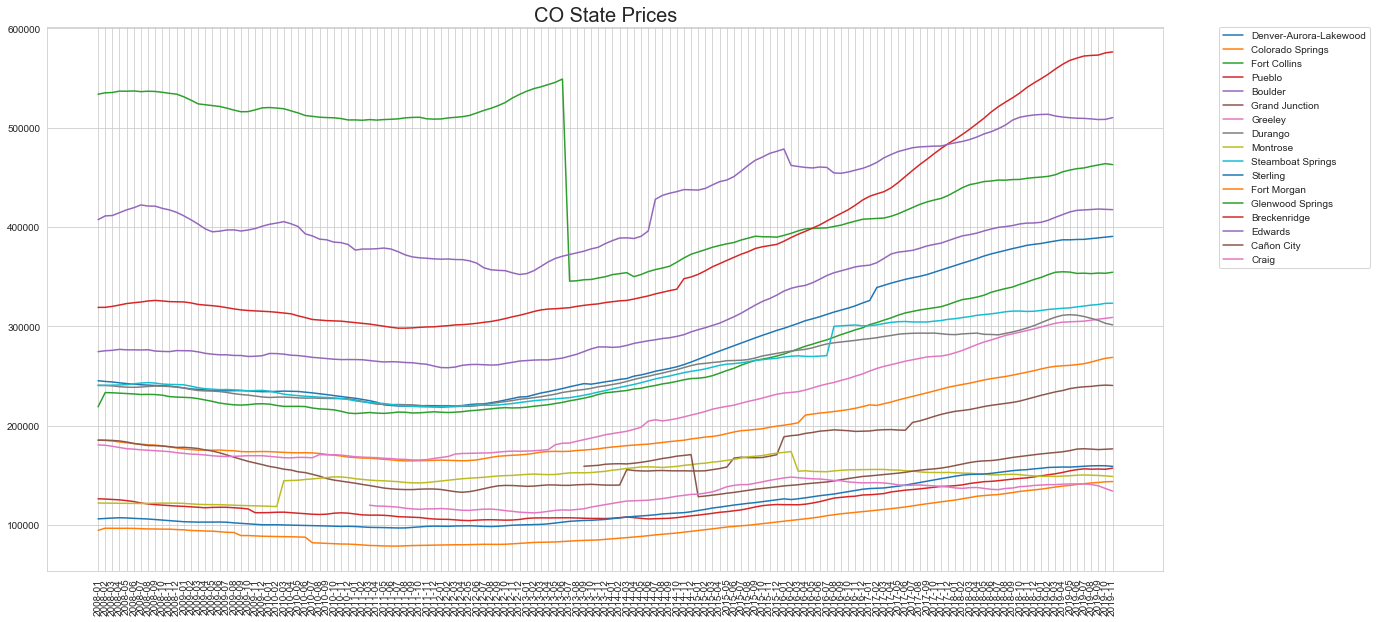

In [201]:
fig, ax = plt.subplots(figsize=(20,10))
keys2 = co_metros.keys()

for msa in keys2:
    ax.plot(co_metros[msa].keys(), co_metros[msa],label = msa)
ax.set_title('CO State Prices', fontsize = 20)
ax.xaxis.set_ticklabels(cols)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.show()

what about a statistical distribution

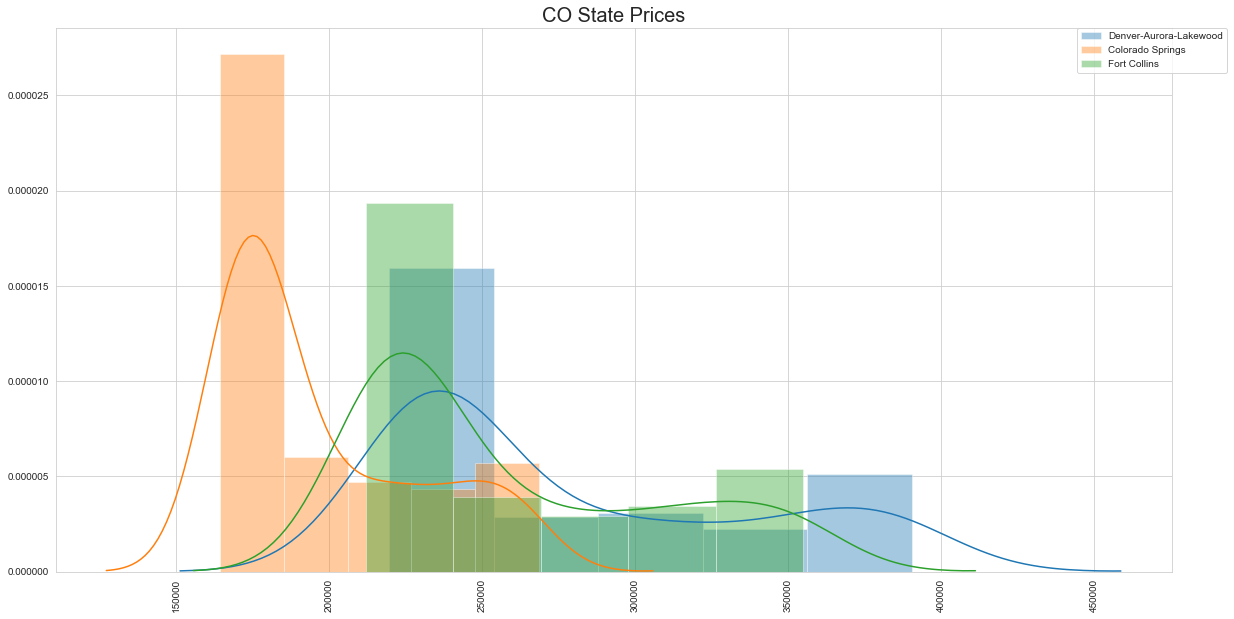

In [203]:
fig, ax = plt.subplots(figsize=(20,10))
keys_topco =list(keys2)[:3]
for msa in keys_topco:
    sns.distplot(co_metros[msa],bins =5 ,label = msa)
ax.set_title('CO State Prices', fontsize = 20)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.show()

### If I Had More Time..

I would take income data as well and contrast the Area Median Income (AMI) with the Average Median Home Price to determine the true 'expensiveness' of a metro politan area.  Unfortunately the AMI data is difficult to find when you are not an institution subscribing to expensive dta sources.  To move forward, either city by city income data or per capita (instead of household) data could be used to approximate AMI.  

In [199]:
keys

['Denver-Aurora-Lakewood', 'Colorado Springs', 'Fort Collins']